In [22]:
import mujoco
from pathlib import Path
import gym_lite6
import gymnasium as gym
import gym_lite6.env, gym_lite6.scripted_policy, gym_lite6.pickup_task
import mediapy as media
import numpy as np


In [24]:
model_path = Path(gym_lite6.__path__[0] + "/../models/lite6_gripper_wide.xml").resolve()
model_spec = mujoco.MjSpec.from_file(str(model_path))

obj_path = gym_lite6.__path__[0] + "/../models/cube_pickup_large.xml"
obj_spec = mujoco.MjSpec.from_file(obj_path)

scene_path = gym_lite6.__path__[0] + "/../models/scene.xml"
scene_spec = mujoco.MjSpec.from_file(scene_path)

In [4]:
def print_bodies(parent, level=0):
  body = parent.first_body()
  while body:
    print(''.join(['-' for i in range(level)]) + body.name)
    print_bodies(body, level + 1)
    body = parent.next_body(body)
print_bodies(scene_spec.worldbody)
for site in scene_spec.sites:
  print(site.name)
for actuator in scene_spec.actuators:
  print(actuator.name)

In [9]:
for i in range(env.unwrapped.model.njnt):
    print(f"{i} {env.unwrapped.model.jnt(i)}")

NameError: name 'env' is not defined

In [25]:
frame = scene_spec.worldbody.add_frame()
frame.attach(model_spec, "", "-1")
frame.attach(obj_spec, "", "-1")

In [96]:
[(i, s.name) for i, s in enumerate(scene_spec.bodies)]

[(0, 'world'),
 (1, 'link_base-1'),
 (2, 'target-1'),
 (3, 'box-1'),
 (4, 'link1-1'),
 (5, 'link2-1'),
 (6, 'link3-1'),
 (7, 'link4-1'),
 (8, 'link5-1'),
 (9, 'link6-1'),
 (10, 'gripper_body-1'),
 (11, 'gripper_left_finger-1'),
 (12, 'gripper_right_finger-1')]

In [26]:
model = scene_spec.compile()
data = mujoco.MjData(model)
renderer = mujoco.Renderer(model)

""

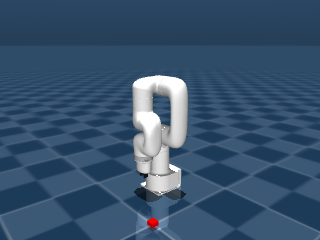

In [5]:
camera = mujoco.MjvCamera()
mujoco.mjv_defaultFreeCamera(model, camera)
camera.distance = 1.2
camera.elevation = -15
camera.azimuth = -130
camera.lookat = (0, 0, 0.3)

mujoco.mj_forward(model, data)

renderer.update_scene(data, camera)
media.show_image(renderer.render())

In [30]:
# dir(scene_spec.compiler)
for attr in dir(scene_spec.compiler):
    if not attr.startswith("__"):
        print(attr, getattr(scene_spec.compiler, attr))

LRopt <MjLROpt
  accel: 20.0
  interval: 2.0
  inttotal: 10.0
  maxforce: 0.0
  mode: 1
  timeconst: 1.0
  timestep: 0.01
  tolrange: 0.05
  useexisting: 1
  uselimit: 0
>
_pybind11_conduit_v1_ <bound method PyCapsule._pybind11_conduit_v1_ of <mujoco._specs.MjsCompiler object at 0x16da53f70>>
alignfree 0
autolimits 1
balanceinertia 0
boundinertia 0.0
boundmass 0.0
degree 1
discardvisual 0
eulerseq <mujoco._specs.MjCharVec object at 0x30ca318f0>
fitaabb 0
fusestatic 0
inertiafromgeom 2
inertiagrouprange [0 5]
settotalmass -1.0
usethread 1


In [32]:
# scene_spec.option
for attr in dir(scene_spec.option):
    if not attr.startswith("__"):
        print(attr, getattr(scene_spec.option, attr))

_pybind11_conduit_v1_ <bound method PyCapsule._pybind11_conduit_v1_ of <mujoco._specs.MjOption object at 0x17f2de930>>
apirate 100.0
ccd_iterations 50
ccd_tolerance 1e-06
cone 0
density 0.0
disableactuator 0
disableflags 0
enableflags 0
gravity [ 0.    0.   -9.81]
impratio 1.0
integrator 0
iterations 100
jacobian 2
ls_iterations 50
ls_tolerance 0.01
magnetic [ 0.  -0.5  0. ]
noslip_iterations 0
noslip_tolerance 1e-06
o_friction [1.e+00 1.e+00 5.e-03 1.e-04 1.e-04]
o_margin 0.0
o_solimp [9.0e-01 9.5e-01 1.0e-03 5.0e-01 2.0e+00]
o_solref [0.02 1.  ]
sdf_initpoints 40
sdf_iterations 10
solver 2
timestep 0.002
tolerance 1e-08
viscosity 0.0
wind [0. 0. 0.]


In [93]:
env.unwrapped.model.geom()

KeyError: "Invalid name ''. Valid names: ['box-1', 'floor', 'gripper_left_finger-1', 'gripper_left_finger_base-1', 'gripper_lite_body_c-1', 'gripper_right_finger-1', 'gripper_right_finger_base-1', 'link1_c-1', 'link2_c-1', 'link3_c-1', 'link4_c-1', 'link5_c-1', 'link6_c-1', 'link_base_c-1']"

In [62]:
model.cam()

KeyError: "Invalid name ''. Valid names: ['gripper_cam-1', 'side_cam-1']"

In [34]:
data.contact.geom

array([[ 0, 23],
       [ 0, 23],
       [ 0, 23],
       [ 0, 23],
       [18, 21]], dtype=int32)

""

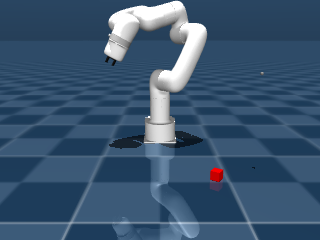

In [88]:
from importlib import reload

reload(gym_lite6.env)
reload(gym_lite6.utils)
reload(gym_lite6.scripted_policy)
reload(gym_lite6.pickup_task)

# task = gym_lite6.pickup_task.GraspTask('gripper_left_finger', 'gripper_right_finger', 'box', 'floor')
task = gym_lite6.pickup_task.GraspAndLiftTask('gripper_left_finger-1', 'gripper_right_finger-1', 'box-1', 'floor')

env = gym.make(
    "UfactoryCubePickup-v0",
    task=task,
    obs_type="pixels_state",
    max_episode_steps=300,
    visualization_width=320,
    visualization_height=240
)

observation, info = env.reset()
media.show_image(env.unwrapped.render(camera="side_cam-1"))


# 1: Create a dataset

In [ ]:
from lerobot.common.datasets.lerobot_dataset import LeRobotDataset
from lerobot.common.robot_devices.control_configs import RecordControlConfig
from PIL import Image

cfg = RecordControlConfig(
    repo_id="eufrizz/lite6_record_scripted_250204",
    single_task="Pick up the block",
    root="datasets/lite6_record_scripted_250204",
    fps=30,
    video=True,
    # push_to_hub=False
)

""" pusht features
From pusht dataset:

{'observation.image': {'dtype': 'video',
  'shape': (96, 96, 3),
  'names': ['height', 'width', 'channel'],
  'video_info': {'video.fps': 10.0,
   'video.codec': 'av1',
   'video.pix_fmt': 'yuv420p',
   'video.is_depth_map': False,
   'has_audio': False}},
 'observation.state': {'dtype': 'float32',
  'shape': (2,),
  'names': {'motors': ['motor_0', 'motor_1']}},
 'action': {'dtype': 'float32',
  'shape': (2,),
  'names': {'motors': ['motor_0', 'motor_1']}},
 'episode_index': {'dtype': 'int64', 'shape': (1,), 'names': None},
 'frame_index': {'dtype': 'int64', 'shape': (1,), 'names': None},
 'timestamp': {'dtype': 'float32', 'shape': (1,), 'names': None},
 'next.reward': {'dtype': 'float32', 'shape': (1,), 'names': None},
 'next.done': {'dtype': 'bool', 'shape': (1,), 'names': None},
 'next.success': {'dtype': 'bool', 'shape': (1,), 'names': None},
 'index': {'dtype': 'int64', 'shape': (1,), 'names': None},
 'task_index': {'dtype': 'int64', 'shape': (1,), 'names': None}}
"""

features={'action.qpos': {'dtype': 'float32',
  'shape': (6,)},
  'action.gripper': {'dtype': 'int8',
  'shape': (1,)},
 'observation.state.qpos': {'dtype': 'float32',
  'shape': (6,)},
 'observation.state.qvel': {'dtype': 'float32',
  'shape': (6,)},
  'observation.state.gripper': {'dtype': 'float32',
  'shape': (1,)},
 'observation.ee_pose.pos': {'dtype': 'float32',
  'shape': (3,)},
'observation.ee_pose.quat': {'dtype': 'float32',
  'shape': (4,)},
'observation.ee_pose.vel': {'dtype': 'float32',
  'shape': (3,)},
'observation.ee_pose.ang_vel': {'dtype': 'float32',
  'shape': (3,)},
 'observation.images.gripper': {'dtype': 'video',
  'shape': (240, 320, 3),
  'names': ['height', 'width', 'channels'],
  'info': None},
 'observation.images.side': {'dtype': 'video',
  'shape': (240, 320, 3),
  'names': ['height', 'width', 'channels'],
  'info': None},
   'episode_index': {'dtype': 'int64', 'shape': (1,), 'names': None},
 'frame_index': {'dtype': 'int64', 'shape': (1,), 'names': None},
 'timestamp': {'dtype': 'float32', 'shape': (1,), 'names': None},
 'reward': {'dtype': 'float32', 'shape': (1,), 'names': None},
 'index': {'dtype': 'int64', 'shape': (1,), 'names': None},
 'task_index': {'dtype': 'int64', 'shape': (1,), 'names': None}}

dataset = LeRobotDataset.create(
    cfg.repo_id,
    cfg.fps,
    root=cfg.root,
    features=features,
    use_videos=cfg.video,
    image_writer_processes=0,
    image_writer_threads=1,
)

In [13]:
from lerobot.common.robot_devices.robots.configs import MossRobotConfig
from lerobot.common.robot_devices.robots.utils import make_robot, make_robot_from_config
dummy_robot= make_robot("so100")
LeRobotDataset.create(
    cfg.repo_id,
    cfg.fps,
    root='datasets/dummy',
    robot=dummy_robot,
    use_videos=cfg.video,
    image_writer_processes=0,
    image_writer_threads=1,
).features


{'action': {'dtype': 'float32',
  'shape': (6,),
  'names': ['main_shoulder_pan',
   'main_shoulder_lift',
   'main_elbow_flex',
   'main_wrist_flex',
   'main_wrist_roll',
   'main_gripper']},
 'observation.state': {'dtype': 'float32',
  'shape': (6,),
  'names': ['main_shoulder_pan',
   'main_shoulder_lift',
   'main_elbow_flex',
   'main_wrist_flex',
   'main_wrist_roll',
   'main_gripper']},
 'observation.images.laptop': {'dtype': 'video',
  'shape': (480, 640, 3),
  'names': ['height', 'width', 'channels'],
  'info': None},
 'observation.images.phone': {'dtype': 'video',
  'shape': (480, 640, 3),
  'names': ['height', 'width', 'channels'],
  'info': None},
 'timestamp': {'dtype': 'float32', 'shape': (1,), 'names': None},
 'frame_index': {'dtype': 'int64', 'shape': (1,), 'names': None},
 'episode_index': {'dtype': 'int64', 'shape': (1,), 'names': None},
 'index': {'dtype': 'int64', 'shape': (1,), 'names': None},
 'task_index': {'dtype': 'int64', 'shape': (1,), 'names': None}}

In [95]:
policy = gym_lite6.scripted_policy.GraspAndLiftPolicy(env, 'end_effector-1', 'box-1', 'gripper_left_finger-1', 'gripper_right_finger-1', max_vel=0.2)
policy.reset()
observation, info = env.reset(seed=69, qpos=None, box_pos=None, box_quat=None)

step = 0
done = False
# ep_dict = {"action.qpos": [], "action.gripper": [], "observation.state.qpos": [], "observation.state.qvel": [], "observation.state.gripper": [], "observation.pixels.side": [], "observation.pixels.gripper": [], "reward": [], "timestamp": [], "frame_index": [],}

while not done:
    # start_loop_t = time.perf_counter()

    action = policy(env.unwrapped.model, env.unwrapped.data, observation, info)

    # delta = action["pos"] - observation["ee_pose"]["pos"]

    # # Quaternion error
    # quat_err = np.empty(4)
    # curr_quat = observation["ee_pose"]["quat"]
    # curr_quat_conj = np.empty(4)
    # ang_delta = np.empty(3)
    # mujoco.mju_negQuat(curr_quat_conj, curr_quat)
    # mujoco.mju_mulQuat(quat_err, action["quat"], curr_quat_conj)
    # mujoco.mju_quat2Vel(ang_delta, quat_err, 1.0)
    
    # # Convert to velocity (in world frame)
    # vel = Kp * delta * env.metadata["render_fps"]
    # ang_vel = Kp * ang_delta * env.metadata["render_fps"]
    # # Transform to end effector frame
    # action["qvel"] = env.unwrapped.solve_ik_vel(vel, ang_vel, ref_frame='end_effector', local=False)
    
    observation, reward, terminated, truncated, info = env.step(action)


    obs_dict = {}
    obs_dict["action.qpos"] = action["qpos"]
    obs_dict["action.gripper"] = action["gripper"]
    obs_dict["observation.state.qpos"] = observation["state"]["qpos"]
    obs_dict["observation.state.qvel"] = observation["state"]["qvel"]
    obs_dict["observation.state.gripper"] = observation["state"]["gripper"]
    obs_dict["observation.images.side"] = observation["pixels"]["side"]
    obs_dict["observation.images.gripper"] = observation["pixels"]["gripper"]
    obs_dict["observation.ee_pose.pos"] = observation["ee_pose"]["pos"]
    obs_dict["observation.ee_pose.quat"] = observation["ee_pose"]["quat"]
    obs_dict["observation.ee_pose.vel"] = observation["ee_pose"]["vel"]
    obs_dict["observation.ee_pose.ang_vel"] = observation["ee_pose"]["ang_vel"]
    obs_dict["reward"] = reward
    obs_dict["timestamp"] = env.unwrapped.data.time
    dataset.add_frame(obs_dict)

    if (policy.done):
      terminated = True
    print(f"{step=} {reward=} {terminated=}")
    done = terminated | truncated | done
    step += 1

dataset.image_writer.wait_until_done()
media.show_video([np.asarray(Image.open(p)) for p in dataset.episode_buffer['observation.images.side']], fps=env.metadata["render_fps"])

# if terminated:
#     print("Success!")
#     dataset.save_episode(cfg.single_task)
# else:
#     print(f"Failure! Reached {policy.stage}")
#     dataset.clear_episode_buffer()

# media.show_video(obs_dict["observation.images.gripper"], fps=env.metadata["render_fps"])

{0: {'start_time': 0.0, 'end_time': 2.8822975199130245, 'T_start': array([[-0.9717117 ,  0.19181336,  0.13778247,  0.25979616],
       [ 0.18313122,  0.98035476, -0.07326331, -0.18715091],
       [-0.14912858, -0.04595854, -0.9877492 ,  0.0337319 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'T_end': array([[ 1.        ,  0.        ,  0.        ,  0.35938421],
       [ 0.        , -1.        ,  0.        ,  0.18390729],
       [ 0.        ,  0.        , -1.        ,  0.048     ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'goal_pos': array([0.35938421, 0.18390729, 0.048     ]), 'goal_quat': array([0, 1, 0, 0])}}
step=0 reward=0 terminated=False
step=1 reward=0 terminated=False
step=2 reward=0 terminated=False
step=3 reward=0 terminated=False
step=4 reward=0 terminated=False
step=5 reward=0 terminated=False
step=6 reward=0 terminated=False
step=7 reward=0 terminated=False
step=8 reward=0 terminated=False
step=9 reward=0 terminated=False
step=10 re

In [41]:
dataset.clear_episode_buffer()

In [ ]:
cfg = RecordControlConfig(
    repo_id="eufrizz/lite6_record_scripted_250206",
    single_task="Pick up the block",
    root="datasets/lite6_record_scripted_250206",
    fps=env.metadata["render_fps"],
    video=True,
    # push_to_hub=False
)

def record_episodes_to_lerobot(env, policy, cfg, num_ep=1):
    dataset = LeRobotDataset.create(
        cfg.repo_id,
        cfg.fps,
        root=cfg.root,
        features=features,
        use_videos=cfg.video,
        image_writer_processes=0,
        image_writer_threads=1,
    )

    successful_trajectories = 0
    while successful_trajectories < num_ep:
        step = 0
        done = False
        policy.reset()
        observation, info = env.reset(seed=69, qpos=None, box_pos=None, box_quat=None)
        while not done:
            # start_loop_t = time.perf_counter()

            action = policy(env.unwrapped.model, env.unwrapped.data, observation, info)
            observation, reward, terminated, truncated, info = env.step(action)

            obs_dict = {}
            obs_dict["action.qpos"] = action["qpos"]
            obs_dict["action.gripper"] = action["gripper"]
            obs_dict["observation.state.qpos"] = observation["state"]["qpos"]
            obs_dict["observation.state.qvel"] = observation["state"]["qvel"]
            obs_dict["observation.state.gripper"] = observation["state"]["gripper"]
            obs_dict["observation.images.side"] = observation["pixels"]["side"]
            obs_dict["observation.images.gripper"] = observation["pixels"]["gripper"]
            obs_dict["observation.ee_pose.pos"] = observation["ee_pose"]["pos"]
            obs_dict["observation.ee_pose.quat"] = observation["ee_pose"]["quat"]
            obs_dict["observation.ee_pose.vel"] = observation["ee_pose"]["vel"]
            obs_dict["observation.ee_pose.ang_vel"] = observation["ee_pose"]["ang_vel"]
            obs_dict["reward"] = reward
            obs_dict["timestamp"] = env.unwrapped.data.time
            dataset.add_frame(obs_dict)

            if (policy.done):
                terminated = True
                print(f"{step=} {reward=} {terminated=}")
                done = terminated | truncated | done
                step += 1
        
        if terminated:
            print("Success!")
            successful_trajectories += 1
            dataset.save_episode(cfg.single_task)
            # dataset.image_writer.wait_until_done()
            # media.show_video([np.asarray(Image.open(p)) for p in dataset.episode_buffer['observation.images.side']], fps=env.metadata["render_fps"])

        else:
            # print(f"Failure! Reached {policy.stage}")
            print("Failed, retrying", policy.done, terminated)
            dataset.clear_episode_buffer()



policy = gym_lite6.scripted_policy.GraspAndLiftPolicy(env, 'end_effector-1', 'box-1', 'gripper_left_finger-1', 'gripper_right_finger-1', max_vel=0.2)
record_episodes_to_lerobot()
# media.show_video(obs_dict["observation.images.gripper"], fps=env.metadata["render_fps"])

In [59]:
dataset.encode_videos()

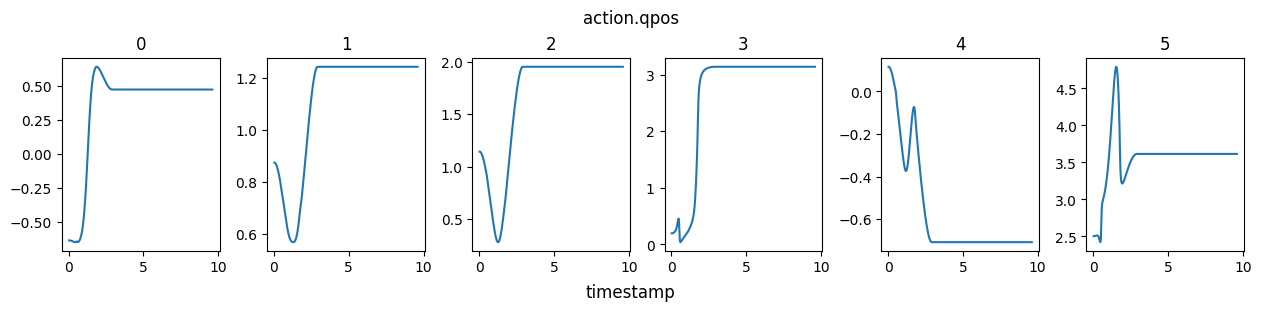

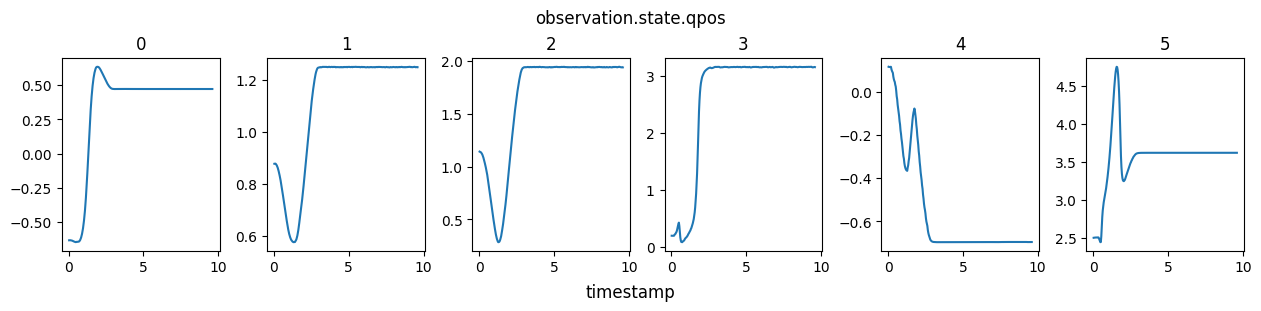

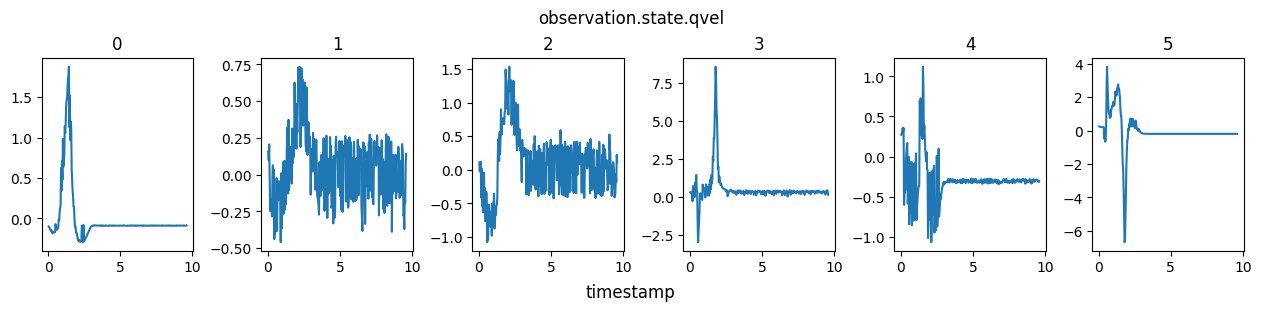

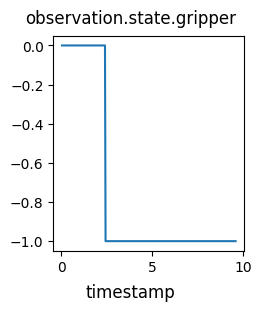

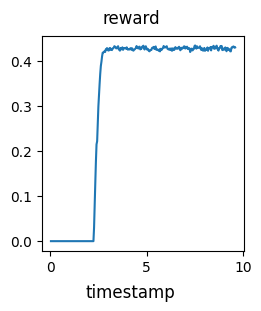

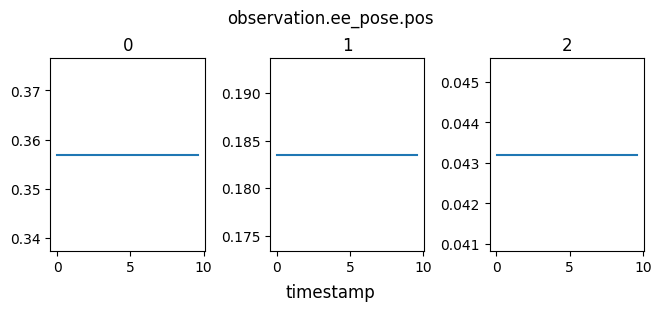

In [105]:

gym_lite6.utils.plot_dict_of_arrays(dataset.episode_buffer, "timestamp", keys=["action.qpos", "observation.state.qpos", "observation.state.qvel", "observation.state.gripper", "reward", "observation.ee_pose.pos"], sharey=False)


In [100]:
dataset.episode_buffer.keys()

dict_keys(['size', 'action.qpos', 'action.gripper', 'observation.state.qpos', 'observation.state.qvel', 'observation.state.gripper', 'observation.ee_pose.pos', 'observation.ee_pose.quat', 'observation.ee_pose.vel', 'observation.ee_pose.ang_vel', 'observation.images.gripper', 'observation.images.side', 'episode_index', 'frame_index', 'timestamp', 'reward', 'index', 'task_index'])

In [106]:
policy.goal_pos

AttributeError: 'GraspAndLiftPolicy' object has no attribute 'goal_pos'